## Lab Assignment: Advanced Machine Learning Techniques

### Objective: To apply knowledge of advanced machine learning in Python.

### Instructions:

1. Build a convolutional neural network (CNN) using Keras to classify images from the CIFAR-10 dataset. Evaluate the performance of the model using metrics such as accuracy and loss.
2. Implement a recurrent neural network (RNN) using TensorFlow to perform sentiment analysis on a dataset of movie reviews. Train the model on a subset of the data and evaluate its performance on the remaining data.
3. Implement a generative adversarial network (GAN) using TensorFlow to generate images of handwritten digits. Train the model on the MNIST dataset and evaluate its performance by generating new images.


### Assignment Deliverables:
Take any one of these and create a Jupyter notebook solution to implement your own advanced model.  It is understood to be the first iteration, so it may not be the most optimized solution.  

### Grading Criteria:

1. Correctness and functionality of each function/program
2. Proper use of basic control structures and functions
3. Code readability and organization
4. Note: Students are encouraged to work collaboratively, but each student must submit their own work. In addition, students should utilize version control (e.g. GitHub) to  manage their code and collaborate with peers.

### Deep Learning and Neural Networks
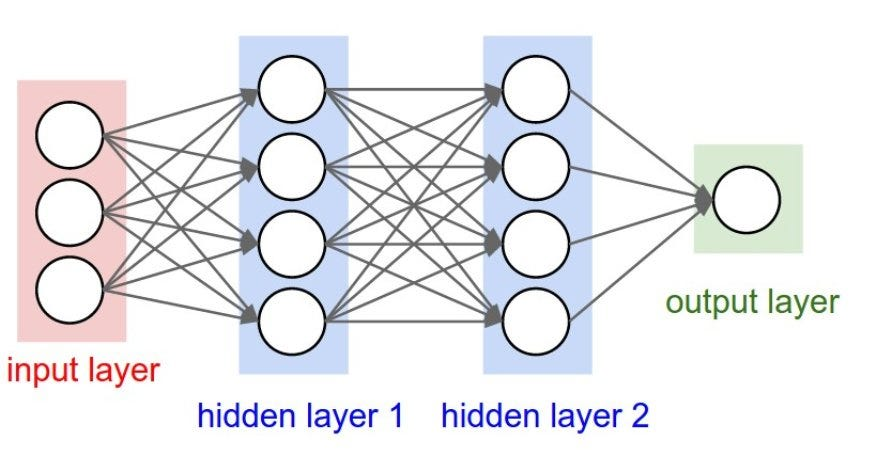

source: https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

### Convolutional Neural Networks (CNN)
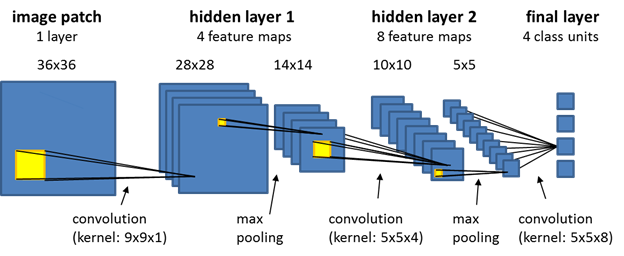

source: https://docs.ecognition.com/eCognition_documentation/User%20Guide%20Developer/8%20Classification%20-%20Deep%20Learning.htm

### Recurrent Neural Networks (RNN)
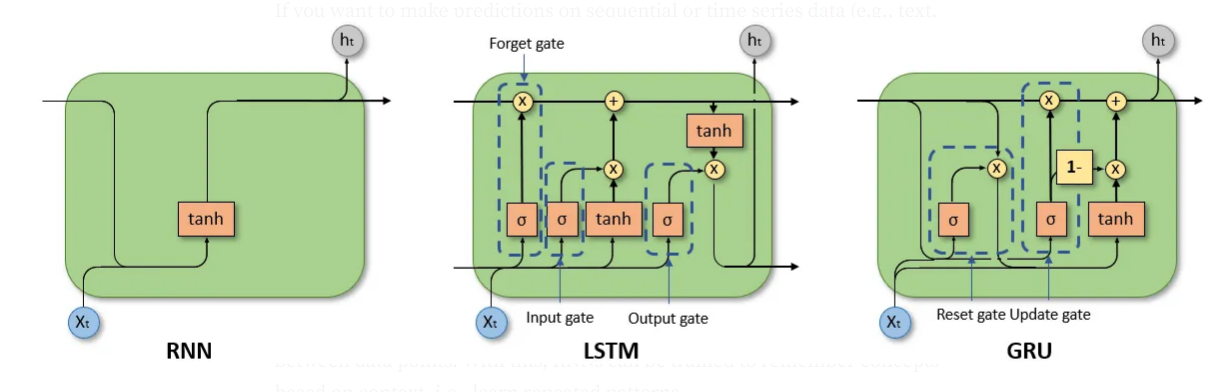

source: https://towardsdatascience.com/a-brief-introduction-to-recurrent-neural-networks-638f64a61ff4

### Generative Adversarial Networks (GAN)
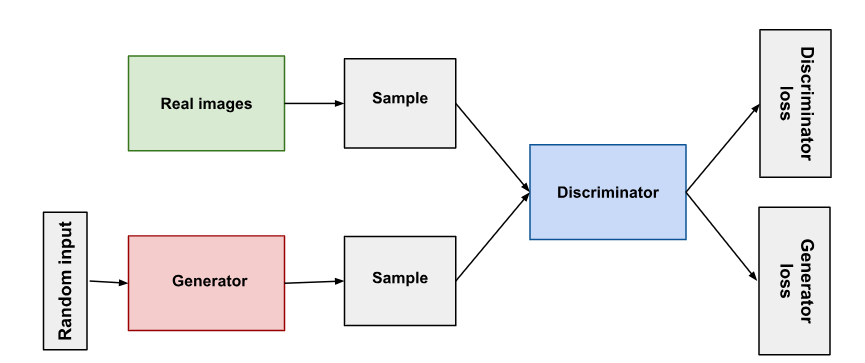

source: https://developers.google.com/machine-learning/gan/gan_structure


Build a convolutional neural network (CNN) using Keras to classify images. Evaluate the performance of the model using metrics such as accuracy and loss.

<font size=2>A Convolutional Neural Network (CNN) is a type of deep learning model designed for processing and analyzing visual data such as images and videos. CNNs are particularly effective in tasks that involve pattern recognition and feature extraction from images. They have revolutionized the field of computer vision and are widely used in various applications, including image classification, object detection, facial recognition, and image generation.

The key characteristic of CNNs is their ability to automatically learn hierarchical representations of visual data. This is achieved through the use of specialized layers called convolutional layers, which apply filters (also known as kernels) to input images to extract important features. Convolutional layers leverage the spatial relationships present in images by scanning small windows (patches) across the input and performing element-wise multiplications and summations.

CNNs typically consist of multiple layers stacked together, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers extract local features and capture spatial information, while the pooling layers reduce the spatial dimensions of the features to make them more manageable. Finally, the fully connected layers aggregate the extracted features and make predictions based on them.

Training a CNN involves feeding it with labeled training data and iteratively adjusting the network's parameters (weights and biases) through a process called backpropagation. During training, the CNN learns to recognize patterns and features in the input data that are relevant for the given task. The network's parameters are optimized using various techniques, such as gradient descent, to minimize a specified loss function.

CNNs have demonstrated outstanding performance in a wide range of computer vision tasks, often outperforming traditional machine learning algorithms. Their ability to automatically learn and extract relevant features from images, coupled with their hierarchical architecture, makes them highly effective in capturing complex visual patterns and achieving state-of-the-art results in image-related tasks.
</font>

In this example, we use the CIFAR-10 dataset as an example, but you can replace it with the desired dataset suitable for image classification. Here's an overview of the steps performed:

1. Load and prepare the dataset, dividing it into training and testing sets.
2. Normalize the pixel values of the images between 0 and 1.
3. Define the CNN architecture using the Sequential API from Keras, consisting of convolutional layers, pooling layers, and fully connected layers.
4. Compile the model with an optimizer, loss function, and evaluation metrics.
5. Train the model on the training data for a specified number of epochs.
6. Evaluate the trained model on the test set to obtain the test accuracy and loss.
7. Print the test accuracy and loss metrics.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load and prepare the dataset (example: CIFAR-10)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Define the CNN architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# Print the model summary
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Print the test accuracy and loss
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


Epoch 1/10
391/391 [==============================] - 22s 45ms/step - loss: 1.6218 - accuracy: 0.4094
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 1.2684 - accuracy: 0.5487
Epoch 3/10
391/391 [==============================] - 21s 53ms/step - loss: 1.1072 - accuracy: 0.6096
Epoch 4/10
391/391 [==============================] - 20s 52ms/step - loss: 0.9996 - accuracy: 0.6507
Epoch 5/10
391/391 [==============================] - 20s 51ms/step - loss: 0.9138 - accuracy: 0.6818
Epoch 6/10
391/391 [==============================] - 19s 49ms/step - loss: 0.8459 - accuracy: 0.7060
Epoch 7/10
391/391 [==============================] - 20s 51ms/step - loss: 0.7826 - accuracy: 0.7272
Epoch 8/10
391/391 [==============================] - 18s 46ms/step - loss: 0.7412 - accuracy: 0.7405
Epoch 9/10
391/391 [==============================] - 19s 48ms/step - loss: 0.6982 - accuracy: 0.7570
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 0.8248 

Implement a recurrent neural network (RNN) using TensorFlow to perform sentiment analysis on a dataset of movie reviews. Train the model on a subset of the data and evaluate its performance on the remaining data.

<font size=2>A Recurrent Neural Network (RNN) is a type of deep learning model that is specifically designed for handling sequential data. Unlike traditional feedforward neural networks, RNNs have connections that allow information to flow in cycles, allowing them to retain and process information from previous steps in the sequence.

RNNs are particularly effective in tasks that involve sequences of data, such as time series analysis, speech recognition, machine translation, sentiment analysis, and text generation. They can capture the temporal dependencies and relationships within sequential data, making them well-suited for tasks where the order and context of the data are important.

The distinguishing feature of an RNN is its ability to maintain an internal state (also known as "hidden state" or "memory") that captures information from previous steps and influences the predictions or computations at the current step. This allows RNNs to process sequences of arbitrary lengths by sharing the learned weights across time steps.

The core component of an RNN is the recurrent layer, which takes as input both the current input and the hidden state from the previous step, producing an output and updating the hidden state. The recurrent layer is typically based on a simple recurrent unit called the "vanilla" RNN, but more advanced variations such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) have been developed to address the vanishing gradient problem and improve the RNN's ability to capture long-term dependencies.

During training, RNNs are optimized using gradient-based methods such as backpropagation through time (BPTT). The gradients flow backward through the entire sequence, allowing the model to learn the relationships and dependencies within the sequential data. By iteratively adjusting the model's parameters, the RNN can learn to make accurate predictions or generate meaningful outputs based on the input sequence.

RNNs have shown remarkable success in various domains that involve sequential data. Their ability to capture dependencies across time steps makes them powerful for tasks that require understanding and generating sequences, such as language modeling, speech recognition, sentiment analysis, and machine translation. However, RNNs can suffer from the vanishing or exploding gradient problem, which limits their ability to capture long-term dependencies. This has led to the development of more sophisticated architectures, such as LSTM and GRU, which alleviate these issues and have become popular choices for modeling sequential data.
</font>

1. Set the parameters for the model and training, such as the maximum number of words to keep, the maximum length of each review, batch size, and number of epochs.
2. Load the IMDB movie review dataset using imdb.load_data(), limiting the number of words based on their frequency.
3. Pad the sequences of the reviews to ensure a consistent length using pad_sequences().
4. Build the RNN model using the Sequential API from Keras, including an Embedding layer, SimpleRNN layer, and a Dense layer for binary classification.
5. Compile the model with an optimizer, loss function, and evaluation metrics.
6. Train the model on the training data, with a validation split to monitor performance during training.
7. Evaluate the trained model on the test set using model.evaluate(), obtaining the test accuracy and loss.
8. Print the test accuracy and loss metrics.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the parameters for the model and training
max_features = 10000  # Maximum number of words to keep based on word frequency
max_len = 200  # Maximum length of each review (pad or truncate if needed)
batch_size = 32
epochs = 5

# Load the IMDB movie review dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad the sequences to have a consistent length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Build the RNN model
model = keras.Sequential([
    layers.Embedding(max_features, 32),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)

# Print the test accuracy and loss
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


Epoch 1/5
625/625 [==============================] - 16s 19ms/step - loss: 0.5691 - accuracy: 0.6851 - val_loss: 0.4473 - val_accuracy: 0.8034
Epoch 2/5
625/625 [==============================] - 11s 18ms/step - loss: 0.3626 - accuracy: 0.8511 - val_loss: 0.3744 - val_accuracy: 0.8484
Epoch 3/5
625/625 [==============================] - 10s 16ms/step - loss: 0.2866 - accuracy: 0.8839 - val_loss: 0.4006 - val_accuracy: 0.8180
Epoch 4/5
625/625 [==============================] - 11s 17ms/step - loss: 0.2386 - accuracy: 0.9079 - val_loss: 0.3721 - val_accuracy: 0.8604
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.3947 - accuracy: 0.8511
Test Accuracy: 0.8511199951171875
Test Loss: 0.3947369456291199


Implement a generative adversarial network (GAN) using TensorFlow to generate images of handwritten digits. Train the model on the MNIST dataset and evaluate its performance by generating new images.

<font size=2>
A Generative Adversarial Network (GAN) is a class of deep learning models that consists of two components: a generator network and a discriminator network. GANs are designed to generate new data that is similar to the training data, allowing them to create realistic and high-quality synthetic samples.

The generator network's objective is to learn to generate synthetic data samples that resemble the real data. It takes random noise as input and produces synthetic samples. The generator is typically a deep neural network that learns to transform the noise into meaningful data samples.

The discriminator network's objective is to distinguish between the real and synthetic samples generated by the generator. It takes both real data samples from the training dataset and synthetic samples generated by the generator as input and learns to classify them correctly. The discriminator is also a deep neural network that learns to differentiate between real and synthetic data.

The training process of GANs involves a competitive game between the generator and discriminator networks. The generator tries to produce synthetic samples that are realistic enough to fool the discriminator, while the discriminator aims to accurately classify between real and synthetic samples. Through this adversarial training, both networks improve their performance over time.

The generator and discriminator networks are trained simultaneously, but they are optimized using opposing objectives. The generator aims to minimize the discriminator's ability to distinguish between real and synthetic samples, while the discriminator tries to maximize its ability to differentiate between the two. This adversarial training process leads to the development of a generator that can produce realistic samples, and a discriminator that becomes increasingly better at distinguishing between real and synthetic data.

GANs have gained significant attention and popularity due to their ability to generate high-quality, realistic data across various domains such as images, text, music, and more. They have been used for tasks like image synthesis, image-to-image translation, text generation, style transfer, and data augmentation.

GANs have also evolved to include variations such as conditional GANs, where the generator generates samples conditioned on specific input, and deep convolutional GANs (DCGANs), which leverage convolutional neural networks for image synthesis.

However, training GANs can be challenging due to the delicate balance between the generator and discriminator. Issues such as mode collapse (where the generator produces limited diversity) and training instability can arise. Researchers continue to explore techniques and architectures to address these challenges and enhance the stability and performance of GANs.
</font>

1. Set the parameters for the model and training, such as the dimensionality of the latent space, number of epochs, and batch size.
2. Load and preprocess the MNIST dataset, scaling the pixel values to the range [0, 1] and reshaping the images.
3. Build the generator using Sequential, consisting of several layers to upsample the noise to generate images.
4. Build the discriminator using Sequential, consisting of several convolutional layers to discriminate between real and fake images.
5. Compile the discriminator with an optimizer, loss function, and metrics.
6. Build the GAN by stacking the generator on top of the discriminator.
7. Compile the GAN with an optimizer and loss function.
8. Train the GAN in a loop, where the generator generates fake images, the discriminator learns to distinguish between real and fake images, and the GAN trains the generator to generate more convincing images.
9. Generate new images using the trained generator by passing random noise through it.
10. Display the generated images.

Epoch 1/50 - Discriminator Loss: 3.702059507369995, Generator Loss: 0.05676800012588501
Epoch 2/50 - Discriminator Loss: 2.3303074836730957, Generator Loss: 0.07772766798734665
Epoch 3/50 - Discriminator Loss: 2.4773998260498047, Generator Loss: 0.08009462803602219
Epoch 4/50 - Discriminator Loss: 2.2933120727539062, Generator Loss: 0.062063068151474
Epoch 5/50 - Discriminator Loss: 2.5361127853393555, Generator Loss: 0.04609411954879761
Epoch 6/50 - Discriminator Loss: 2.601466655731201, Generator Loss: 0.06497898697853088
Epoch 7/50 - Discriminator Loss: 2.973742723464966, Generator Loss: 0.045462802052497864
Epoch 8/50 - Discriminator Loss: 2.6542599201202393, Generator Loss: 0.07036471366882324
Epoch 9/50 - Discriminator Loss: 2.4911577701568604, Generator Loss: 0.08827535063028336
Epoch 10/50 - Discriminator Loss: 3.316032886505127, Generator Loss: 0.036011114716529846
Epoch 11/50 - Discriminator Loss: 2.84832763671875, Generator Loss: 0.06844718754291534
Epoch 12/50 - Discriminat

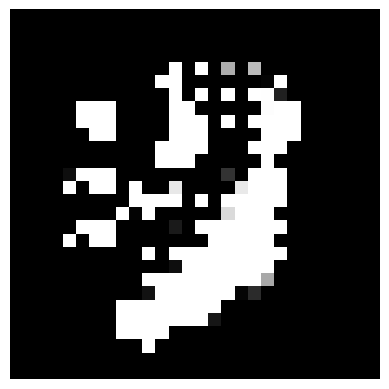

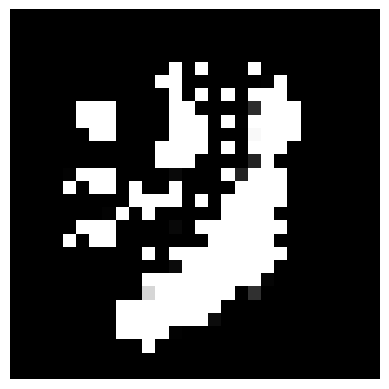

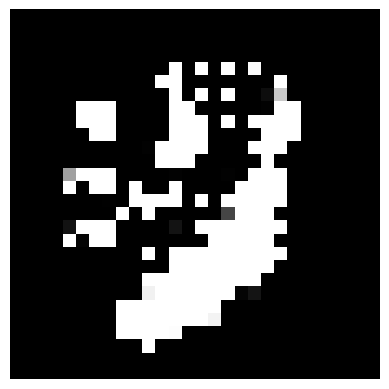

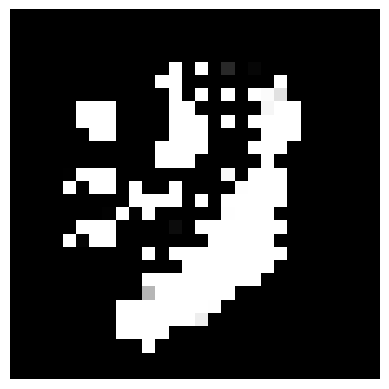

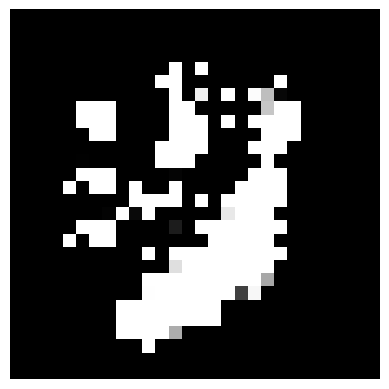

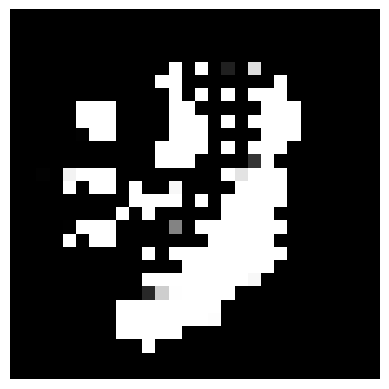

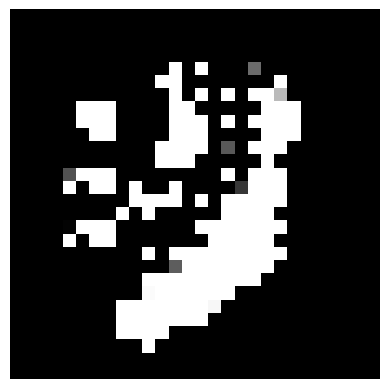

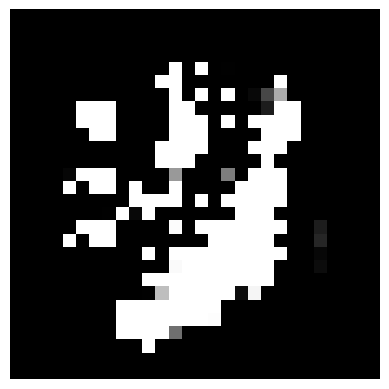

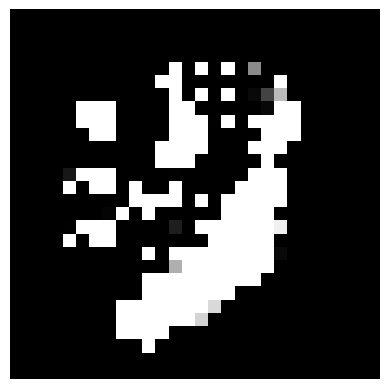

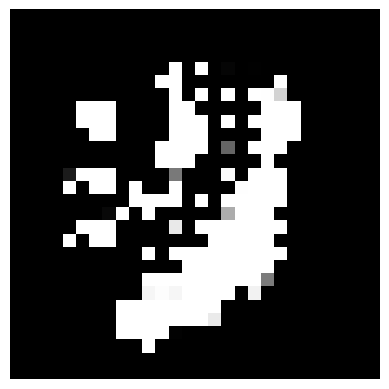

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Set the parameters for the model and training
latent_dim = 100  # Dimensionality of the latent space
epochs = 50       # Number of epochs to train for
batch_size = 128  # Batch size for training

# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)

# Build the generator
generator = keras.Sequential([
    layers.Dense(7 * 7 * 256, input_dim=latent_dim),
    layers.Reshape((7, 7, 256)),
    layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding="same"),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2DTranspose(64, kernel_size=3, strides=1, padding="same"),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same", activation="sigmoid")
])

# Build the discriminator
discriminator = keras.Sequential([
    layers.Conv2D(64, kernel_size=3, strides=2, padding="same", input_shape=(28, 28, 1)),
    layers.LeakyReLU(alpha=0.01),
    layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.01),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compile the discriminator
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002),
                      loss=keras.losses.BinaryCrossentropy(),
                      metrics=["accuracy"])

# Build the GAN
gan = keras.Sequential([generator, discriminator])

# Compile the GAN
gan.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002),
            loss=keras.losses.BinaryCrossentropy())

# Define the training loop
for epoch in range(epochs):
    for batch in range(x_train.shape[0] // batch_size):
        # Generate random noise as input to the generator
        noise = tf.random.normal(shape=(batch_size, latent_dim))

        # Generate fake images using the generator
        generated_images = generator(noise)

        # Create a batch of real images from the training dataset
        real_images = x_train[batch * batch_size : (batch + 1) * batch_size]

        # Concatenate the real and fake images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Create the labels for the discriminator (fake: 0, real: 1)
        labels = tf.concat([tf.zeros((batch_size, 1)), tf.ones((batch_size, 1))], axis=0)

        # Train the discriminator
        discriminator_loss = discriminator.train_on_batch(combined_images, labels)

        # Generate random noise as input to the GAN
        noise = tf.random.normal(shape=(batch_size, latent_dim))

        # Create misleading labels for the generator (fake: 1)
        misleading_labels = tf.ones((batch_size, 1))

        # Train the GAN (generator only)
        gan_loss = gan.train_on_batch(noise, misleading_labels)

    # Print the losses at the end of each epoch
    print(f"Epoch {epoch+1}/{epochs} - Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {gan_loss}")

# Generate new images using the trained generator
num_images = 10
noise = tf.random.normal(shape=(num_images, latent_dim))
generated_images = generator.predict(noise)

# Display the generated images
for i in range(num_images):
    plt.imshow(generated_images[i, :, :, 0], cmap="gray")
    plt.axis("off")
    plt.show()


In the context of the Generative Adversarial Network (GAN) code you ran, the generated images represent synthetic handwritten digits. The GAN has learned to generate new images that resemble the digits from the MNIST dataset, which is a widely-used dataset of handwritten digits.

The images you see are generated by the generator network of the GAN. The generator takes random noise as input and transforms it into an image that resembles a handwritten digit. As the GAN is trained, the generator improves its ability to generate more realistic and convincing digit images.

The quality and realism of the generated images can vary based on factors such as the architecture of the GAN, the training duration, and the complexity of the dataset. Generally, as the GAN training progresses, the generated images should become more recognizable as handwritten digits, with clearer shapes and more defined features.

It's important to note that the GAN generates synthetic images based on patterns and characteristics learned from the training data. While the generated images may resemble real handwritten digits, they are not actual samples from real individuals. The purpose of GANs is to learn and generate new data that shares similarities with the training dataset, providing a way to create synthetic samples for various applications, including image generation, data augmentation, and creative exploration.

### What figures were used for training?
In the MNIST dataset, the training process typically involves using a large subset of the available images. The exact figure or digit chosen for training can vary depending on the specific implementation and the desired task.

The MNIST dataset consists of 60,000 labeled images of handwritten digits, with each image representing a single digit from 0 to 9. These images are split into a training set (typically 50,000 images) and a separate test set (10,000 images) for evaluation.

During the training of a machine learning model, such as a GAN, it is common to randomly sample images from the training set in each training iteration or epoch. This random sampling helps the model learn from a diverse range of digit examples and avoids bias towards specific digits.

Therefore, in the case of the GAN training using the MNIST dataset, the model is exposed to multiple images of different digits throughout the training process. It learns to generate realistic digit images that resemble the entire range of handwritten digits present in the training set, rather than being focused on a specific figure.

### The generated images do not look like actual handwritten digits.  
If the generated images from the GAN model do not resemble the actual handwritten digits from the MNIST dataset, it may indicate that the model needs further training or adjustments.

GANs can be challenging to train and require careful tuning of various parameters, including the network architecture, learning rates, and training duration, to achieve optimal results. It is possible that the model has not converged yet or requires additional training iterations to improve the quality of the generated images.

Here are a few things you can try to enhance the performance of the GAN model:

1. Increase the training duration: Training a GAN can be a time-consuming process, and sometimes models require more training iterations to learn the underlying patterns in the data effectively. You can try increasing the number of training epochs and observe if the quality of the generated images improves.

2. Adjust the architecture and hyperparameters: Experiment with different network architectures, layer configurations, and hyperparameters such as the learning rate, batch size, and optimizer choice. Optimizing these parameters can have a significant impact on the performance of the GAN model.

3. Explore other GAN variations: GANs have several variants, such as DCGAN (Deep Convolutional GAN), WGAN (Wasserstein GAN), and others. These variants may provide better results depending on the specific task and dataset. Consider exploring different GAN architectures to see if they generate more realistic images.

4. Increase model capacity: GANs can benefit from larger and deeper network architectures. Consider increasing the capacity of the generator and discriminator networks by adding more layers or increasing the number of hidden units. This can help the model learn more complex representations and generate better-quality images.

5. Regularize the model: Apply regularization techniques such as dropout or batch normalization to reduce overfitting and improve generalization. Regularization can help the model learn more robust features and avoid generating overly specific images.

Remember that training GANs can be an iterative process of experimentation and fine-tuning. It may require multiple iterations and adjustments to achieve satisfactory results.